# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Подключение-датафреймов" data-toc-modified-id="Подключение-датафреймов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подключение датафреймов</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Функция-для-расчета-прибыли" data-toc-modified-id="Функция-для-расчета-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Функция для расчета прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Первый регион</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание данных

**Признаки:**
 - <font style="font-style: italic;">id</font> — уникальный идентификатор скважины
 - <font style="font-style: italic;">f0</font> — первый признак точек
 - <font style="font-style: italic;">f1</font> — второй признак точек
 - <font style="font-style: italic;">f2</font> — третий признак точек


**Целевой признак:**
- <font style="font-style: italic;">product</font> — объём запасов в скважине (тыс. баррелей)

## Загрузка и подготовка данных

### Подключение библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from matplotlib import pyplot as plt

### Подключение датафреймов

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

### Исследование данных

In [3]:
def research(data):
    print(data.head())
    print()
    print(data.info())
    print()
    print(data.corr())

In [4]:
research(data_1)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


In [5]:
research(data_2)

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


In [6]:
research(data_3)

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


**Во всех датафреймах 100_000 строк, названия столбцов записаны корректно, типы данных в столбцах выставлены корректно, столбец 'id' не нужен для дальнейшего анализа, пропусков в данных нет, минимальная корреляция присутствует лишь между признаком 'f2' и целевым признаком 'product'.**

### Предобработка данных

**Уберем ненужный столбец "id"**

In [7]:
data_1, data_2, data_3 = [data.drop(['id'], axis=1) for data in [data_1, data_2, data_3]]

**Разделим выборки на обучающие и валидационные**

In [8]:
RANDOM_STATE = 12345

In [9]:
features_1 = data_1.drop(['product'], axis=1)
target_1 = data_1['product']
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=.25, random_state=RANDOM_STATE)

In [10]:
features_2 = data_2.drop(['product'], axis=1)
target_2 = data_2['product']
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=.25, random_state=RANDOM_STATE)

In [11]:
features_3 = data_3.drop(['product'], axis=1)
target_3 = data_3['product']
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=.25, random_state=RANDOM_STATE)

## Обучение и проверка модели

**Обучим модели и получим предсказания**

In [12]:
model = LinearRegression()

In [13]:
def model_train_and_predict(model, features_train, target_train, features_valid, target_valid):
    model.fit(features_train, target_train)
    return pd.Series(model.predict(features_valid), index=target_valid.index)

In [14]:
predictions_valid_1 = model_train_and_predict(model, features_train_1, target_train_1, features_valid_1, target_valid_1)

In [15]:
predictions_valid_2 = model_train_and_predict(model, features_train_2, target_train_2, features_valid_2, target_valid_2)

In [16]:
predictions_valid_3 = model_train_and_predict(model, features_train_3, target_train_3, features_valid_3, target_valid_3)

**Напечатаем среднее и RMSE моделей**

In [17]:
def show_mean_and_rmse(target_valid, predictions_valid):
    print('Среднее:', predictions_valid.mean())
    print('RMSE:', mean_squared_error(target_valid, predictions_valid) ** 0.5)

In [18]:
show_mean_and_rmse(target_valid_1, predictions_valid_1)

Среднее: 92.59256778438035
RMSE: 37.5794217150813


In [19]:
show_mean_and_rmse(target_valid_2, predictions_valid_2)

Среднее: 68.728546895446
RMSE: 0.893099286775617


In [20]:
show_mean_and_rmse(target_valid_3, predictions_valid_3)

Среднее: 94.96504596800489
RMSE: 40.02970873393434


**В первом и третьем регионах среднее примерно 93, а среднеквадратическая ошибка примерно 38. А во втором регионе среднее - 68, а предсказания очень точны, т.к. среднеквадратическая ошибка равна 1.**

## Подготовка к расчёту прибыли

In [21]:
BUDGET = 10 ** 10
BARREL_INCOME = 450_000
POINTS_AMOUNT = 500
BEST_POINTS_AMOUNT = 200
ALPHA = .025
BOOTSTRAPPING_ITERATIONS_COUNT = 1000

In [22]:
MEAN_PRODUCT_ONE_BARREL = BUDGET / BEST_POINTS_AMOUNT / BARREL_INCOME
MEAN_PRODUCT_ONE_BARREL

111.11111111111111

**В первом и третьем регионах среднее значение немного меньше значение для безубыточной разработки, а во втором - значительно меньше.**

## Функция для расчета прибыли

In [23]:
def revenue(target, predictions, count, budget, barrel_income):
    pred_sorted = predictions.sort_values(ascending=False)
    selected = target[pred_sorted.index][:count]
    return barrel_income * selected.sum() - budget

## Расчёт прибыли и рисков 

In [24]:
state = RandomState(RANDOM_STATE)

**Функция для метрик:**

In [25]:
def metrics(values, alpha):
    print('Cреднее:', int(values.mean()))
    print(f'{(1-alpha*2):.0%}-й доверительный интервал: ({int(values.quantile(alpha))}, {int(values.quantile(1-alpha))})')
    print(f'Риск убытков: {((values < 0).sum() / len(values)):.3%}')
    values.plot(kind='hist', title='Гистограмма возможной прибыли')
    plt.show()

**Функция для вычисления:**

In [26]:
def bootstrap(iterations_count, points_amount, best_points_amount, target, predictions, budget, alpha, barrel_income):
    values = []
    for _ in range(iterations_count):
        target_subsample = target.sample(n=points_amount, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, pred_subsample, best_points_amount, budget, barrel_income))
    metrics(pd.Series(values), alpha)

### Первый регион

Cреднее: 425938526
95%-й доверительный интервал: (-102090094, 947976353)
Риск убытков: 6.000%


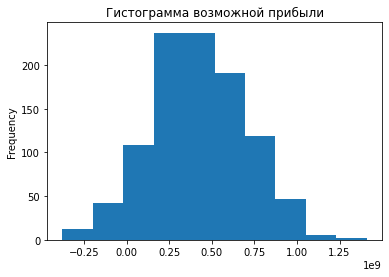

In [28]:
values_1 = bootstrap(
    BOOTSTRAPPING_ITERATIONS_COUNT,
    POINTS_AMOUNT,
    BEST_POINTS_AMOUNT,
    target_valid_1,
    predictions_valid_1,
    BUDGET,
    ALPHA,
    BARREL_INCOME)

Cреднее: 518259493
95%-й доверительный интервал: (128123231, 953612982)
Риск убытков: 0.300%


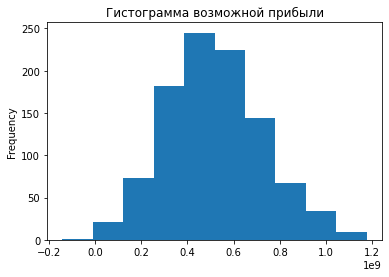

In [30]:
values_2 = bootstrap(
    BOOTSTRAPPING_ITERATIONS_COUNT,
    POINTS_AMOUNT,
    BEST_POINTS_AMOUNT,
    target_valid_2,
    predictions_valid_2,
    BUDGET,
    ALPHA,
    BARREL_INCOME)

Cреднее: 420194005
95%-й доверительный интервал: (-115852609, 989629939)
Риск убытков: 6.200%


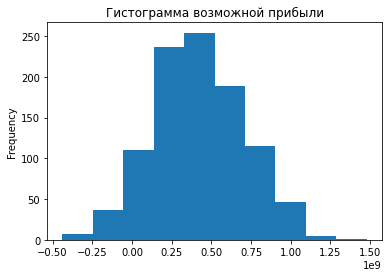

In [31]:
values_3 = bootstrap(
    BOOTSTRAPPING_ITERATIONS_COUNT,
    POINTS_AMOUNT,
    BEST_POINTS_AMOUNT,
    target_valid_3,
    predictions_valid_3,
    BUDGET,
    ALPHA,
    BARREL_INCOME)

**Только во втором регионе риск убытка меньше 2.5% и наивысший средний доход, а также в 95%-й доверительный интервал не входят отрицательные значения дохода, поэтому нужно выбрать второй регион для разработки.**